<a href="https://colab.research.google.com/github/smreynolds92/Great-Learning/blob/main/CV_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

*** I have used the class workbooks, my previous projects, and internet searches as an example for much of my coding in this project.

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Library for reading and showing images
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import keras
import os
import math # Importing math module to perform mathematical operations
import random
import time
import tensorflow as tf

from tensorflow.keras.models import (
    Sequential,
    Model,
) # sequential api for sequential model

from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Activation,
    Input,
    LeakyReLU,
) # importing different layers

from tensorflow.keras.utils import to_categorical # to perform one-hot encoding

from tensorflow.keras.optimizers import (
    RMSprop,
    Adam,
    SGD,
) # optimiers for optimizing the model

from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
) # regularization method to prevent the overfitting

from tensorflow.keras import losses, optimizers, backend

# Importing all the required sub-modules from Keras
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    img_to_array,
    load_img,
)

from sklearn import preprocessing # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split # Importing train_test_split function to split the data into train and test
from sklearn import metrics
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from google.colab.patches import cv2_imshow # Display images using OpenCV
from google.colab import drive

# Ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [128]:
#print("NumPy version:", np.__version__)

## Loading the dataset

In [2]:
# Connecting to google colab drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Computer-Vision-Project-wk6/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Computer-Vision-Project-wk6/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [4]:
# Reviewing the shape of the images and label data
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [5]:
# List of the 12 categories from greatest count to least count
labels.value_counts().reset_index(name='count')

,Label,count
0,Loose Silky-bent,654
1,Common Chickweed,611
2,Scentless Mayweed,516
3,Small-flowered Cranesbill,496
4,Fat Hen,475
5,Charlock,390
6,Sugar beet,385
7,Cleavers,287
8,Black-grass,263
9,Shepherds Purse,231


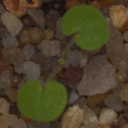

In [6]:
# cv2 image
cv2_imshow(images[5])

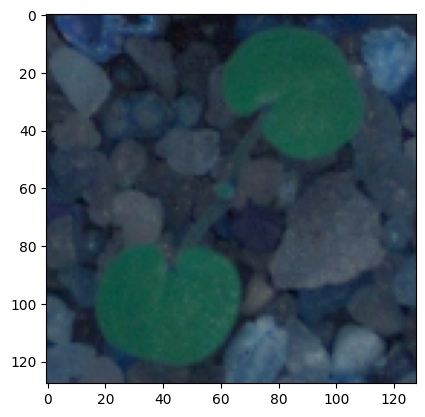

In [7]:
# matplotlib image
plt.imshow(images[5]);

**Observation:**
- When using the matplotlib we can see that the images are in BGR format and will need to be converted to RBG format.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?

  - The plants have different leaf configurations and sizes.  
  - Some images have very thin leaves, while others have larger rounded leaves.  
  - Also, different counts of leaves and patterns of leaves can be seen.
  - Some pictures are dark while others are bright.  
  - And some pictures are crisp while others are more blurry.

2. Is the dataset provided an imbalance? (Check with using bar plots)

  Yes, please see bar plot below for more information.


In [8]:
# Function to show 12 random images and their category names

def plot_images(images,labels):
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(12, 10))                                               # Defining the figure size to 12x10
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

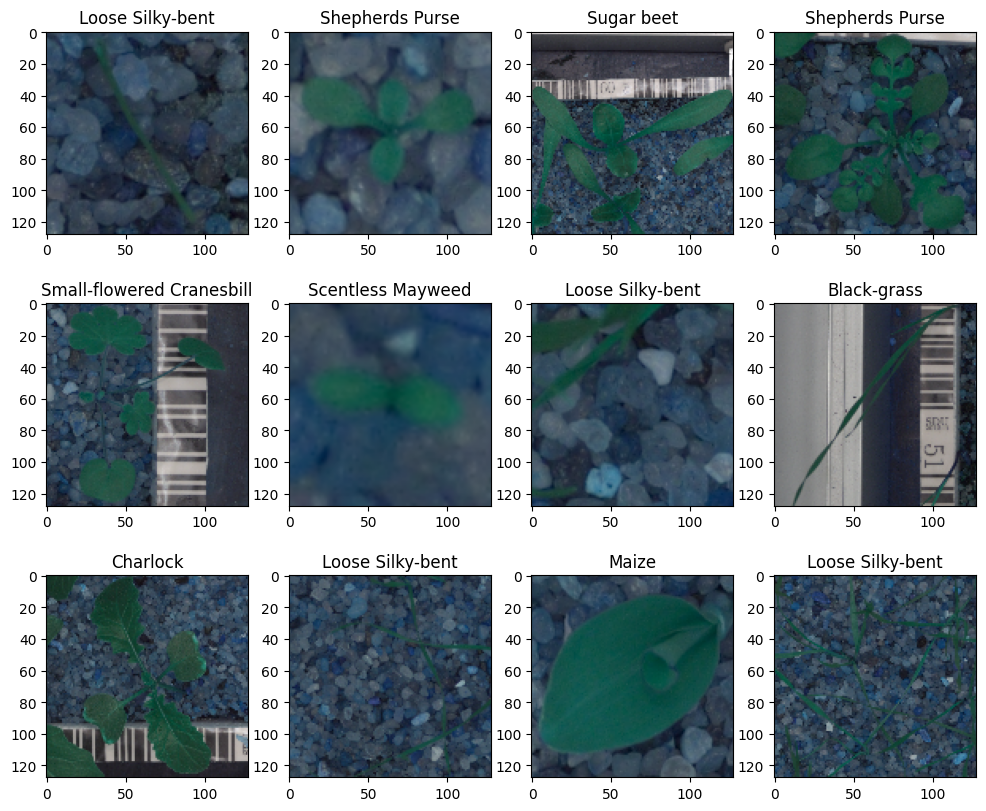

In [11]:
# Plotting the 12 random images and their category names
plot_images(images,labels)

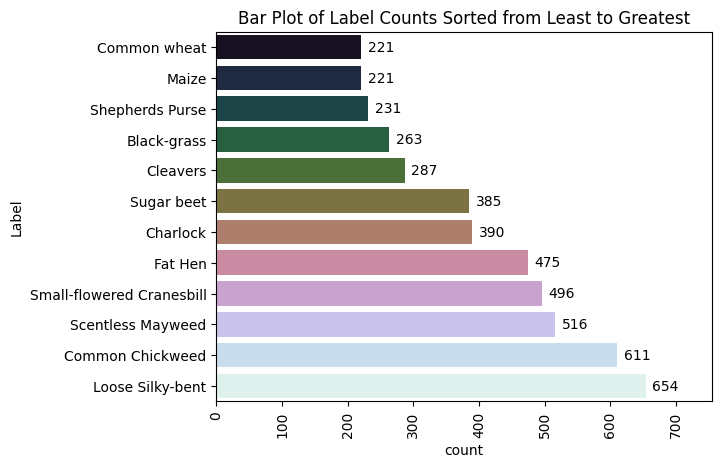

In [12]:
# Bar plot of the Label Counts Sorted from Least to Greatest
ax = sns.countplot(labels['Label'], palette="cubehelix", order = labels['Label'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation='vertical')

# Annotate the bars with the counts
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar
    height = p.get_height()  # Get the height of the bar
    y = p.get_y() + height / 2  # Y position of the annotation (center of the bar)
    x = width + 10 # X position of the annotation (end of the bar)
    ax.annotate(f'{int(width)}', (x, y), ha='left', va='center')

# Optionally, adjust x-axis limits to make room for annotations
ax.set_xlim(0, ax.get_xlim()[1] * 1.1)

# Set labels and title
ax.set_title('Bar Plot of Label Counts Sorted from Least to Greatest')

plt.show()

**Observation:**
- The data is unbalanced, so some seedlings may be recognized more easily than others.


## Data Pre-Processing

### Convert the BGR images to RGB images.

In [13]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
# Resizing the image from 128 to 64
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

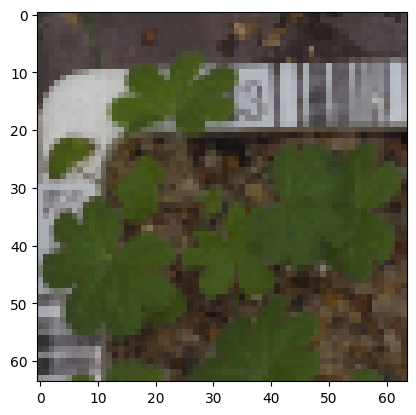

In [15]:
# Image after being resized from 128 to 64
plt.imshow(images_decreased[3]);

**Observation:**
- The image has been converted to RGB.
- The image is not as crisp since it has been resized to a lower image size.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [16]:
# Splitting the the data into train, validation, and test datasets
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.111, random_state=42,stratify=y_temp)

In [17]:
# Printing the shape of the train, validation, and test datasets
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3800, 64, 64, 3) (3800, 1)
(475, 64, 64, 3) (475, 1)
(475, 64, 64, 3) (475, 1)


**Observation:**
- The train set has 80% of the data while the validation and test sets each have 10% of the data.

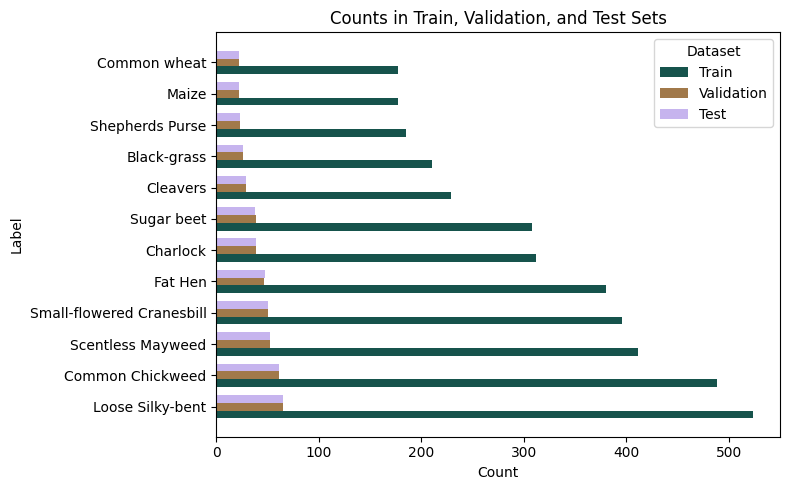

In [18]:
# Barplot to show the counts all 3 datasets  for all 12 categories

# Count the occurrences of each label and ensure correct types
train_counts = y_train.value_counts().reset_index()
train_counts.columns = ['Label', 'Count']
train_counts['Source'] = 'Train'

val_counts = y_val.value_counts().reset_index()
val_counts.columns = ['Label', 'Count']
val_counts['Source'] = 'Validation'

test_counts = y_test.value_counts().reset_index()
test_counts.columns = ['Label', 'Count']
test_counts['Source'] = 'Test'

# Concatenate DataFrames
combined_df = pd.concat([train_counts, val_counts, test_counts], ignore_index=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))

# Get unique labels and ensure they are clean
labels_combined = combined_df['Label'].unique()
labels_combined = [str(label) for label in labels_combined]  # Ensure labels are strings

# Define the color palette
palette = sns.color_palette("cubehelix", 3)  # Using Seaborn's cubehelix palette with 3 colors

# Set up positions for each group of bars
bar_width = 0.25
index = np.arange(len(labels_combined))

# Plot bars for each source, grouped by label
for i, (source, color) in enumerate(zip(['Train', 'Validation', 'Test'], palette)):
    df_group = combined_df[combined_df['Source'] == source]
    # Align the bars for each label by source
    ax.barh(index + i * bar_width - bar_width, df_group['Count'], bar_width, label=source, color=color)

# Add labels and title
ax.set_yticks(index)
ax.set_yticklabels(labels_combined)  # Directly set y-tick labels to ensure clean display
ax.set_xlabel('Count')
ax.set_ylabel('Label')
ax.set_title('Counts in Train, Validation, and Test Sets')
ax.legend(title='Dataset')

# Adjust layout to ensure labels are visible
plt.tight_layout()
plt.show()

**Observation:**
- Now that the data has been split, it can be seen that each group seems to have a similar percentage of the different categories.

### Encode the target labels

In [19]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [20]:
# Reviewing the shape of the encoded train, validation, and test datasets
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape    # Complete the code to check the shape of train, validation and test data

((3800, 12), (475, 12), (475, 12))

**Observation:**
- The are now 12 classes.

In [21]:
# Reviewing the data in the y_train_encoded dataset
y_train_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

**Observation:**
- The data is now in one hot vectors.

### Data Normalization

In [22]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Evaluation Criterion

In [23]:
# Function to clear the backend and to set the random variable

def set_clear_random():

    backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

In [24]:
# Function to show the accuracy

def make_accuracy_model(history_values):

    #Plotting Train accuracy vs Validation recall
    plt.plot(history_values.history['accuracy'])
    plt.plot(history_values.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [25]:
# Function to create a confusion matrix on the model data

def make_confusion_matrix(actual_targets, predicted_targets):

    #Printing the classification report
    print(classification_report(actual_targets, predicted_targets))

    #Plotting the heatmap using confusion matrix
    confusion_matrix = tf.math.confusion_matrix(actual_targets, predicted_targets)
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax,
    )
    # Rotate xticklabels
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    ax.xaxis.set_ticklabels(list(enc.classes_), rotation=90)
    ax.yaxis.set_ticklabels(list(enc.classes_), rotation=0)
    plt.show()

In [26]:
# Collects the training accuracy data from each model to compare the differences
accuracy_metric_df = pd.DataFrame(columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])

In [27]:
# Collects the history time data from each model to compare the differences
history_time_df = pd.DataFrame(columns=["Time (sec)"])

In [28]:
# Collects the history time data from each model to compare the differences
trainable_params_df = pd.DataFrame(columns=["Trainable Params"])

In [29]:
# Function to the count of the Trainable Parameters for each model

def count_trainable_params(model, model_description):
    """
    Print out the trainable parameters

    """
    total_params = 0
    trainable_params = 0
    non_trainable_params = 0

    for layer in model.layers:
        for var in layer.trainable_variables:
            param_count = tf.size(var).numpy()
            total_params += param_count
            if var.trainable:
                trainable_params += param_count

    trainable_params_df.loc[model_description] = trainable_params

## Model Building

In [30]:
# Clearing backend
backend.clear_session()

In [31]:
# Intializing a sequential model
model_cnn1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_cnn1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_cnn1.add(MaxPooling2D((2, 2), padding = 'same'))

model_cnn1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_cnn1.add(MaxPooling2D((2, 2), padding = 'same'))

model_cnn1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_cnn1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_cnn1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_cnn1.add(Dense(128, activation='relu'))
model_cnn1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_cnn1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.8)
#opt=Adam()
# Compile model
model_cnn1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_cnn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 601,612 (2.29 MB)

 Trainable params: 601,612 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Training the model and collecting the time it takes to train the model
start = time.time()

history_cnn1 = model_cnn1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

end=time.time()

Epoch 1/50
119/119 - 9s - 77ms/step - accuracy: 0.1297 - loss: 2.4376 - val_accuracy: 0.1368 - val_loss: 2.4179
Epoch 2/50
119/119 - 1s - 7ms/step - accuracy: 0.1442 - loss: 2.4157 - val_accuracy: 0.1895 - val_loss: 2.3963
Epoch 3/50
119/119 - 1s - 10ms/step - accuracy: 0.2124 - loss: 2.2966 - val_accuracy: 0.3347 - val_loss: 2.0114
Epoch 4/50
119/119 - 1s - 6ms/step - accuracy: 0.3513 - loss: 1.8638 - val_accuracy: 0.4063 - val_loss: 1.6508
Epoch 5/50
119/119 - 1s - 7ms/step - accuracy: 0.4105 - loss: 1.6633 - val_accuracy: 0.4716 - val_loss: 1.5197
Epoch 6/50
119/119 - 1s - 7ms/step - accuracy: 0.4695 - loss: 1.5174 - val_accuracy: 0.5095 - val_loss: 1.4327
Epoch 7/50
119/119 - 1s - 7ms/step - accuracy: 0.5103 - loss: 1.3907 - val_accuracy: 0.5789 - val_loss: 1.2961
Epoch 8/50
119/119 - 1s - 7ms/step - accuracy: 0.5576 - loss: 1.2499 - val_accuracy: 0.6105 - val_loss: 1.1219
Epoch 9/50
119/119 - 1s - 10ms/step - accuracy: 0.5982 - loss: 1.1310 - val_accuracy: 0.6232 - val_loss: 1.062

In [33]:
# Printing the time taken to run the model
print("Time taken in seconds ",end-start)

Time taken in seconds  63.61895394325256


In [34]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "Base CNN Model"
time_taken = end-start
time_taken = round(time_taken, 2)

In [35]:
# Adding to the function to show the count of trainable params used for this model
count_trainable_params(model_cnn1, model_name)

In [36]:
# Adding to the function to show the collected history time data
history_time_df.loc[model_name] = time_taken

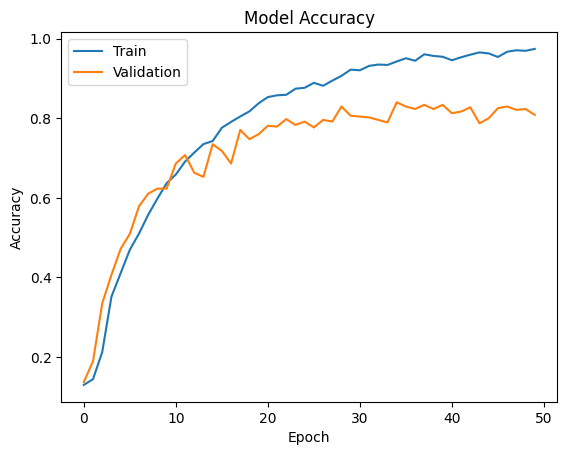

In [37]:
# Showing the Accuracy Model
make_accuracy_model(history_cnn1)

In [38]:
# Showing the test accuracy for this model
accuracy = model_cnn1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 3ms/step - accuracy: 0.8063 - loss: 0.8654


In [39]:
# Evaluate the model on the test data
loss_train, accuracy_train = model_cnn1.evaluate(X_train_normalized, y_train_encoded, verbose=0)

accuracy_train = f"{round(accuracy_train * 100.0, 2)}%"

# Print the accuracy
print("Train Accuracy:", accuracy_train)

Train Accuracy: 99.5%


In [40]:
# Evaluate the model on the test data
loss_val, accuracy_val = model_cnn1.evaluate(X_val_normalized, y_val_encoded, verbose=0)

accuracy_val = f"{round(accuracy_val * 100.0, 2)}%"

# Print the accuracy
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 80.84%


In [41]:
# Evaluate the model on the test data
loss_test, accuracy_test = model_cnn1.evaluate(X_test_normalized, y_test_encoded, verbose=0)

accuracy_test = f"{round(accuracy_test * 100.0, 2)}%"

# Print the accuracy
print("Test Accuracy:", accuracy_test)

Test Accuracy: 80.63%


In [42]:
# Collecting the accuracy data for the train, validation, and test for this model
accuracy_metric_df.loc[model_name] = [accuracy_train, accuracy_val, accuracy_test]

In [43]:
# Here we would get the output as probablities for each category
y_pred1=model_cnn1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [44]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg1=np.argmax(y_pred1,axis=1)
y_test_arg1=np.argmax(y_test_encoded,axis=1)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        26
           1       0.81      0.90      0.85        39
           2       0.81      0.86      0.83        29
           3       0.95      0.87      0.91        61
           4       0.79      0.68      0.73        22
           5       0.84      0.96      0.89        48
           6       0.78      0.78      0.78        65
           7       0.71      0.77      0.74        22
           8       0.76      0.87      0.81        52
           9       0.76      0.57      0.65        23
          10       0.85      0.88      0.86        50
          11       0.96      0.71      0.82        38

    accuracy                           0.81       475
   macro avg       0.79      0.78      0.78       475
weighted avg       0.81      0.81      0.80       475



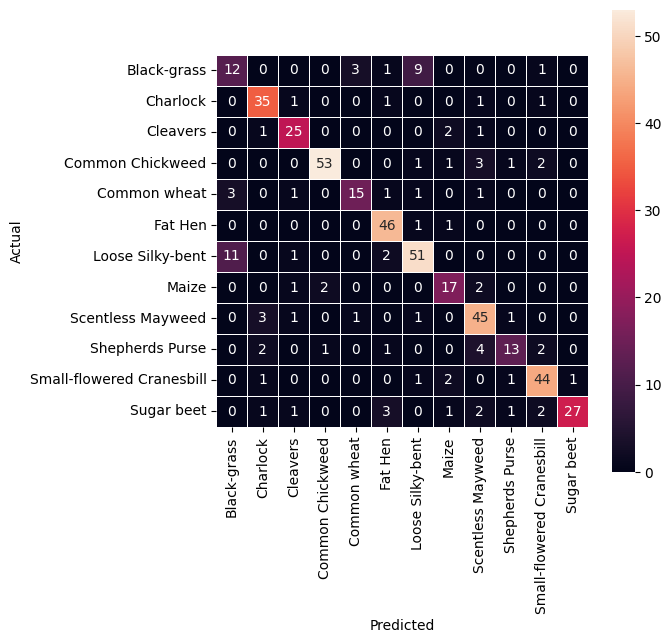

In [45]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_test_arg1,y_pred_arg1)

**Observation:**
- The main observation that stands out for this model is that Black-grass seedlings (f1-score of 46%, precision of 46%, and recall of 46%) are being confused with Loose Silky-bent and vice versa at a higher percentage.
- Black-grass seedlings and Loose Silky-bent seedlings images have some pictures with a thin leaf that look fairly similar.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [46]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [47]:
# Clearing the backend and setting the random variable
set_clear_random()

In [48]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=90,
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [49]:
# Intializing a sequential model
model_cnn2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_cnn2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_cnn2.add(MaxPooling2D((2, 2), padding = 'same'))

# model.add(BatchNormalization())
model_cnn2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_cnn2.add(MaxPooling2D((2, 2), padding = 'same'))
model_cnn2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_cnn2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_cnn2.add(Dense(128, activation='relu'))
model_cnn2.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_cnn2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
#opt = SGD(learning_rate=0.01, momentum=0.8)
opt=Adam()
# Compile model
model_cnn2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_cnn2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,176,460 (8.30 MB)

 Trainable params: 2,176,332 (8.30 MB)

 Non-trainable params: 128 (512.00 B)

In [50]:
# Training the model and collecting the time it takes to train the model

# Epochs
epochs = 50
# Batch size
batch_size = 32

start = time.time()

history_cnn2 = model_cnn2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[learning_rate_reduction])

end=time.time()

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.3547 - loss: 1.9295 - val_accuracy: 0.2379 - val_loss: 2.2363 - learning_rate: 0.0010
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.6562 - loss: 0.8743 - val_accuracy: 0.2463 - val_loss: 2.2462 - learning_rate: 0.0010
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6071 - loss: 1.1708 - val_accuracy: 0.4989 - val_loss: 1.8882 - learning_rate: 0.0010
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5625 - loss: 1.1592 - val_accuracy: 0.5200 - val_loss: 1.8866 - learning_rate: 0.0010
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.6749 - loss: 0.9574 - val_accuracy: 0.6168 - val_loss: 1.3673 - learning_rate: 0.0010
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.8941 - val_accuracy: 0.6379 - val_loss: 1.3408 - learning_rate: 0.0010
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.6902 - los

In [51]:
# Printing the time taken to run the model
print("Time taken in seconds ",end-start)

Time taken in seconds  243.00640892982483


In [52]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "CNN Model with Data Augmentation"
time_taken = end-start
time_taken = round(time_taken, 2)

In [53]:
# Adding to the function to show the count of trainable params used for this model
count_trainable_params(model_cnn2, model_name)

In [54]:
# Adding to the function to show the collected history time data
history_time_df.loc[model_name] = time_taken

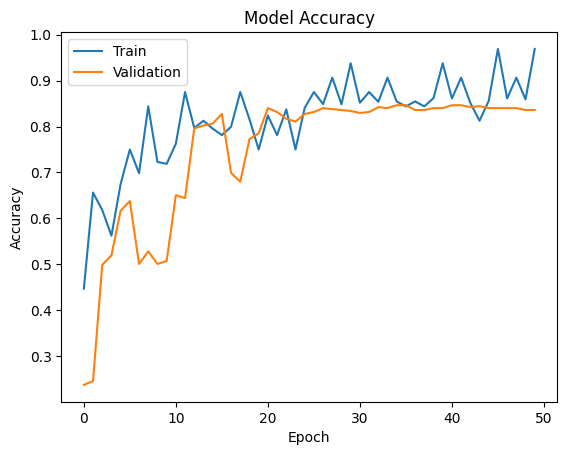

In [55]:
# Showing the Accuracy Model
make_accuracy_model(history_cnn2)

In [56]:
# Showing the test accuracy for this model
accuracy = model_cnn2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 6ms/step - accuracy: 0.8442 - loss: 0.5278


In [57]:
# Evaluate the model on the test data
loss_train, accuracy_train = model_cnn2.evaluate(X_train_normalized, y_train_encoded, verbose=0)

accuracy_train = f"{round(accuracy_train * 100.0, 2)}%"

# Print the accuracy
print("Train Accuracy:", accuracy_train)

Train Accuracy: 88.16%


In [58]:
# Evaluate the model on the test data
loss_val, accuracy_val = model_cnn2.evaluate(X_val_normalized, y_val_encoded, verbose=0)

accuracy_val = f"{round(accuracy_val * 100.0, 2)}%"

# Print the accuracy
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 83.58%


In [59]:
# Evaluate the model on the test data
loss_test, accuracy_test = model_cnn2.evaluate(X_test_normalized, y_test_encoded, verbose=0)

accuracy_test = f"{round(accuracy_test * 100.0, 2)}%"

# Print the accuracy
print("Test Accuracy:", accuracy_test)

Test Accuracy: 84.42%


In [60]:
# Collecting the accuracy data for the train, validation, and test for this model
accuracy_metric_df.loc[model_name] = [accuracy_train, accuracy_val, accuracy_test]

In [61]:
# Here we would get the output as probablities for each category
y_pred2=model_cnn2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [62]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg2=np.argmax(y_pred2,axis=1)
y_test_arg2=np.argmax(y_test_encoded,axis=1)

              precision    recall  f1-score   support

           0       0.47      0.31      0.37        26
           1       0.93      0.95      0.94        39
           2       0.89      0.86      0.88        29
           3       0.91      0.97      0.94        61
           4       0.93      0.59      0.72        22
           5       0.87      0.85      0.86        48
           6       0.72      0.88      0.79        65
           7       0.87      0.91      0.89        22
           8       0.86      0.94      0.90        52
           9       0.93      0.61      0.74        23
          10       0.90      0.86      0.88        50
          11       0.83      0.92      0.88        38

    accuracy                           0.84       475
   macro avg       0.84      0.80      0.81       475
weighted avg       0.84      0.84      0.84       475



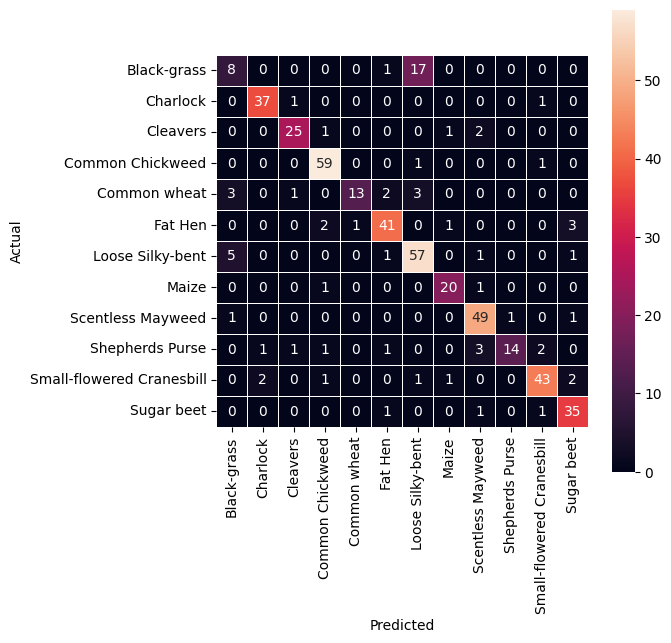

In [63]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_test_arg2,y_pred_arg2)

**Observation:**
- The main observation that stands out for this model is that Black-grass seedlings (f1-score of 37%, precision of 47%, and recall of 31%) are being confused with Loose Silky-bent seedlings and vice versa at a higher percentage.
- Black-grass seedlings and Loose Silky-bent seedlings images have some pictures with a thin leaf that look fairly similar.

## Transfer Learning using VGG16

![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

In [64]:
# Clearing the backend and setting the random variable
set_clear_random()

In [65]:
# Getting only the conv layers for transfer learning.
model_vgg1 = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
transfer_layer = model_vgg1.get_layer('block4_pool')
model_vgg1 = Model(inputs=model_vgg1.input, outputs=transfer_layer.output)
model_vgg1.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,635,264 (29.13 MB)

 Trainable params: 7,635,264 (29.13 MB)

 Non-trainable params: 0 (0.00 B)

**Observation:**
- Chose to use the predefined model up to block4_pool.  Block5_pool caused over-training, and block3_pool was underfitting.

In [66]:
# Showing the vgg1 model without the fully connected layers
# model_vgg1 = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
# model_vgg1.summary()

In [67]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in model_vgg1.layers:
    layer.trainable = False

In [68]:
# Intializing a sequential model
new_model_vgg1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
# Specifying the input shape for the first layer
new_model_vgg1.add(model_vgg1.layers[0]) # Add the first layer of vgg_model instead of the entire model
# Add the remaining layers of vgg_model, excluding the first layer
for layer in model_vgg1.layers[1:]:
    new_model_vgg1.add(layer)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model_vgg1.add(Flatten())

# Adding a dense output layer
new_model_vgg1.add(Dense(128, activation='relu'))
new_model_vgg1.add(Dropout(0.1))
new_model_vgg1.add(Dense(64, activation='relu'))
new_model_vgg1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
#opt = SGD(learning_rate=0.01, momentum=0.8)
opt=Adam()
# Compile model
new_model_vgg1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model_vgg1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,693,004 (33.16 MB)

 Trainable params: 1,057,740 (4.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [69]:
# Training the model and collecting the time it takes to train the model

# Epochs
epochs = 50
# Batch size
batch_size = 32

start = time.time()

history_vgg1 = new_model_vgg1.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
#                    verbose=1)
                    verbose=1,callbacks=[learning_rate_reduction])


end=time.time()

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.1935 - loss: 3.4740 - val_accuracy: 0.4842 - val_loss: 1.5608 - learning_rate: 0.0010
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.8277 - val_accuracy: 0.4989 - val_loss: 1.5405 - learning_rate: 0.0010
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.4606 - loss: 1.5669 - val_accuracy: 0.5916 - val_loss: 1.2644 - learning_rate: 0.0010
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.2721 - val_accuracy: 0.5853 - val_loss: 1.2565 - learning_rate: 0.0010
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.5559 - loss: 1.2576 - val_accuracy: 0.5705 - val_loss: 1.1810 - learning_rate: 0.0010
Epoch 6/50
  1/118 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7188 - loss: 0.9325
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.

In [70]:
# Printing the time taken to run the model
print("Time taken in seconds ",end-start)

Time taken in seconds  231.0662727355957


In [71]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "Transfer Learning Model"
time_taken = end-start
time_taken = round(time_taken, 2)

In [72]:
# Adding to the function to show the count of trainable params used for this model
count_trainable_params(new_model_vgg1, model_name)

In [73]:
# Adding to the function to show the collected history time data
history_time_df.loc[model_name] = time_taken

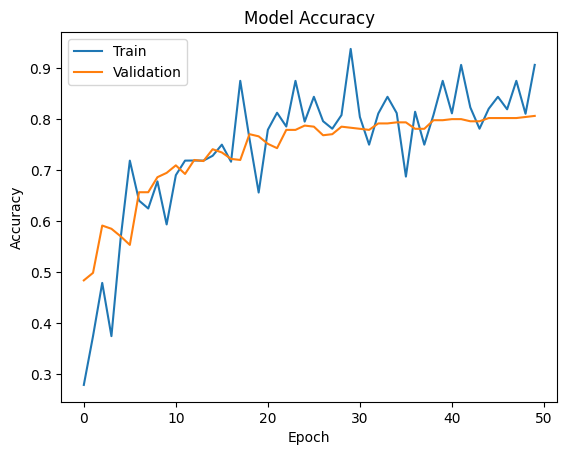

In [74]:
# Showing the Accuracy Model
make_accuracy_model(history_vgg1)

In [75]:
# Showing the test accuracy for this model
accuracy = new_model_vgg1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 16ms/step - accuracy: 0.7684 - loss: 0.7014


In [76]:
# Evaluate the model on the test data
loss_train, accuracy_train = new_model_vgg1.evaluate(X_train_normalized, y_train_encoded, verbose=0)

accuracy_train = f"{round(accuracy_train * 100.0, 2)}%"

# Print the accuracy
print("Train Accuracy:", accuracy_train)

Train Accuracy: 85.66%


In [77]:
# Evaluate the model on the test data
loss_val, accuracy_val = new_model_vgg1.evaluate(X_val_normalized, y_val_encoded, verbose=0)

accuracy_val = f"{round(accuracy_val * 100.0, 2)}%"

# Print the accuracy
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 80.63%


In [78]:
# Evaluate the model on the test data
loss_test, accuracy_test = new_model_vgg1.evaluate(X_test_normalized, y_test_encoded, verbose=0)

accuracy_test = f"{round(accuracy_test * 100.0, 2)}%"

# Print the accuracy
print("Test Accuracy:", accuracy_test)

Test Accuracy: 76.84%


In [79]:
# Collecting the accuracy data for the train, validation, and test for this model
accuracy_metric_df.loc[model_name] = [accuracy_train, accuracy_val, accuracy_test]

In [80]:
# Here we would get the output as probablities for each category
y_pred3=new_model_vgg1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [81]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg3=np.argmax(y_pred3,axis=1)
y_test_arg3=np.argmax(y_test_encoded,axis=1)

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.78      0.82      0.80        39
           2       0.83      0.83      0.83        29
           3       0.92      0.92      0.92        61
           4       0.62      0.68      0.65        22
           5       0.67      0.75      0.71        48
           6       0.75      0.78      0.77        65
           7       0.81      0.77      0.79        22
           8       0.79      0.81      0.80        52
           9       0.78      0.61      0.68        23
          10       0.93      0.80      0.86        50
          11       0.64      0.76      0.70        38

    accuracy                           0.77       475
   macro avg       0.75      0.74      0.74       475
weighted avg       0.77      0.77      0.77       475



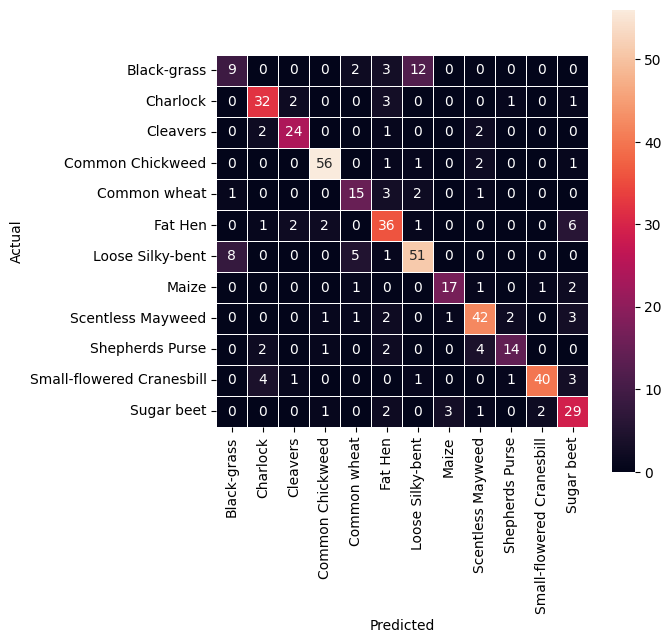

In [82]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_test_arg3,y_pred_arg3)

**Observation:**
- The main observation that stands out for this model is that Black-grass seedlings (f1-score of 41%, precision of 50%, and recall of 35%) are being confused with Loose Silky-bent seedlings and vice versa at a higher percentage.
- Black-grass seedlings and Loose Silky-bent seedlings images have some pictures with a thin leaf that look fairly similar.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

After reviewing the data above and the data in the next section, I have chosen the CNN Model with Data Augmentation as the best model to use for this dataset.

### Visualizing the prediction

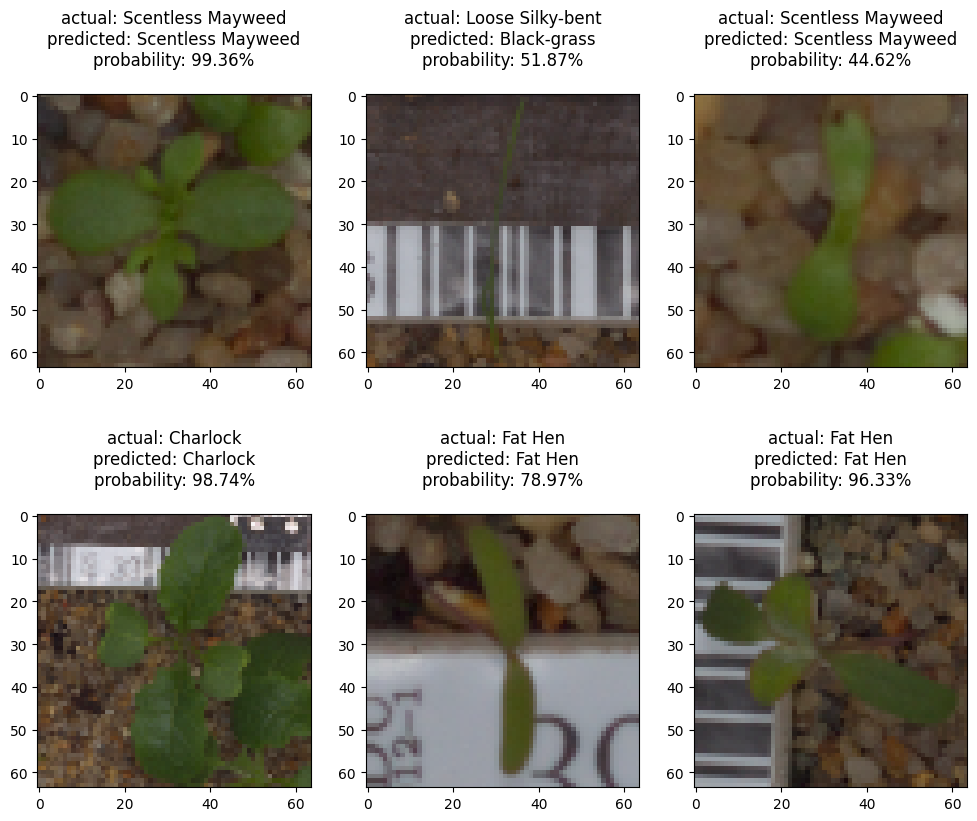

In [91]:
# Printing 6 random pictures with their true, predicted, and probality information

rows = 2
cols = 3
fig = plt.figure(figsize=(12, 10))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test_arg2))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test_normalized[random_index, :])

        pred_label = enc.classes_[y_pred_arg2[random_index]]

        true_label = enc.classes_[y_test_arg2[random_index]]

        array = np.array(y_pred2[random_index])
        index_of_max = np.argmax(array)
        max_value = array[index_of_max]
        pred_proba = max_value * 100
        pred_proba = round(pred_proba, 2)

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:}%\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

**Observation:**
- Showing some results for the best model, which was the  CNN Model with Data Augmentation.  It has higher accuracy, but takes more time, and uses more trainable parameters.
- From the earlier data for this model, it showed that the model did have some issues with telling the difference between Black-grass seedlings and Loose Silky-bent seedlings, so even with a probability of 51.87% from one of the images above it is a mismatch.  As you can see this image is a little blurry, is a little darker, and has a bar code behind the leaf.
- Also, from the data below it shows about an 84.42% test accuracy and having 1 out of 6 fail in the pictures above is close to this prediction.

## Actionable Insights and Business Recommendations

In [92]:
# Printing the comparison of the different models percent performance for the accuracy variable
print("Model Accuracy Comparisons:\n")
accuracy_metric_df

Model Accuracy Comparisons:



,Train Accuracy,Validation Accuracy,Test Accuracy
Base CNN Model,99.5%,80.84%,80.63%
CNN Model with Data Augmentation,88.16%,83.58%,84.42%
Transfer Learning Model,85.66%,80.63%,76.84%


In [93]:
# Printing the comparison of the History time in seconds performance for the accuracy variable
print("Model Time Comparisons:\n")
history_time_df

Model Time Comparisons:



,Time (sec)
Base CNN Model,63.62
CNN Model with Data Augmentation,243.01
Transfer Learning Model,231.07


In [94]:
# Printing the comparison of the different models trainable params
print("Model Trainable Params:\n")
trainable_params_df

Model Trainable Params:



,Trainable Params
Base CNN Model,601612
CNN Model with Data Augmentation,2176332
Transfer Learning Model,1057740


In [95]:
# Printing the comparison of the different models trainable params
print("Base CNN Model Classification Report:\n")
print(classification_report(y_test_arg1,y_pred_arg1))

Base CNN Model Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        26
           1       0.81      0.90      0.85        39
           2       0.81      0.86      0.83        29
           3       0.95      0.87      0.91        61
           4       0.79      0.68      0.73        22
           5       0.84      0.96      0.89        48
           6       0.78      0.78      0.78        65
           7       0.71      0.77      0.74        22
           8       0.76      0.87      0.81        52
           9       0.76      0.57      0.65        23
          10       0.85      0.88      0.86        50
          11       0.96      0.71      0.82        38

    accuracy                           0.81       475
   macro avg       0.79      0.78      0.78       475
weighted avg       0.81      0.81      0.80       475



In [96]:
# Printing the comparison of the different models trainable params
print("Base CNN Model with Data Augmentation Classification Report:\n")
print(classification_report(y_test_arg2,y_pred_arg2))

Base CNN Model with Data Augmentation Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.31      0.37        26
           1       0.93      0.95      0.94        39
           2       0.89      0.86      0.88        29
           3       0.91      0.97      0.94        61
           4       0.93      0.59      0.72        22
           5       0.87      0.85      0.86        48
           6       0.72      0.88      0.79        65
           7       0.87      0.91      0.89        22
           8       0.86      0.94      0.90        52
           9       0.93      0.61      0.74        23
          10       0.90      0.86      0.88        50
          11       0.83      0.92      0.88        38

    accuracy                           0.84       475
   macro avg       0.84      0.80      0.81       475
weighted avg       0.84      0.84      0.84       475



In [97]:
# Printing the comparison of the different models trainable params
print("Transfer Learning Model Classification Report:\n")
print(classification_report(y_test_arg3,y_pred_arg3))

Transfer Learning Model Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.78      0.82      0.80        39
           2       0.83      0.83      0.83        29
           3       0.92      0.92      0.92        61
           4       0.62      0.68      0.65        22
           5       0.67      0.75      0.71        48
           6       0.75      0.78      0.77        65
           7       0.81      0.77      0.79        22
           8       0.79      0.81      0.80        52
           9       0.78      0.61      0.68        23
          10       0.93      0.80      0.86        50
          11       0.64      0.76      0.70        38

    accuracy                           0.77       475
   macro avg       0.75      0.74      0.74       475
weighted avg       0.77      0.77      0.77       475



### Conclusion
- At this point, the accuracy of the test model for the CNN Model with Data Augmentation is 84.42% and is showing the best results.
- The Train/Validation/Test results for the CNN Model with Data Augmentation are all also closer together - 88.16%, 83.58%, and 84.42% respectively.
- When reviewing the classification report for the test data of the CNN Model with Data Augmentation, if shows the all around best results for accuracy, macro avg, and weighted avg, as seen in the results right above the conclusion.
- The CNN Model with Data Augmentation time took the longest of the models.
- The CNN Model with Data Augmentation used the most Trainable parameters.
- At this point the second model - the CNN Model with Data Augmentation is showing the best results, so it is the model I am chosing.

### Scope of Improvement
- The models could be improved more and one of the other 2 models might even do better than the CNN Model with Data Augmentation, if there were more pictures and the dataset was more balanced.
- The models could be trained on the original image size of 128 x 128 instead of the reduced size of 64 x 64, which would allow from more relevent feature and clarity.
- Other items that could be changed in the future would be adjusting Data Augmentation, the Learning-rate reduction level, the Dropout rate, test Batch Normalization on the other models, using CV2 with HSV, and/or trying other Transfer Learning models that are available.

_____